## Observations and Insights 

In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from itertools import groupby
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()

# Combine the data into a single dataset

combined_data = mouse_metadata.merge(study_results,on=["Mouse ID"])

# Display the data table for preview
combined_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [58]:
# Checking the number of mice.
mouse_total = len(pd.unique(combined_data['Mouse ID']))
mouse_total_df = pd.DataFrame({"Number of Mice": [mouse_total]})
mouse_total_df

,Number of Mice
0,249


In [59]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_df = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_df[['Mouse ID', 'Timepoint']]

,Mouse ID,Timepoint
908,g989,0
909,g989,0
910,g989,5
911,g989,5
912,g989,10
913,g989,10
914,g989,15
915,g989,15
916,g989,20
917,g989,20


In [60]:
# Optional: Get all the data for the duplicate mouse ID. 

print(duplicate_df)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [90]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data.drop_duplicates(
  subset = ['Mouse ID', 'Timepoint'],
  keep = 'last').reset_index(drop = True)

#this might not be the *most* scientific, but I think the data looks ugly with too many decimal places
pd.options.display.float_format = '{:.4f}'.format

clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0000,0
1,k403,Ramicane,Male,21,16,5,38.8259,0
2,k403,Ramicane,Male,21,16,10,35.0143,1
3,k403,Ramicane,Male,21,16,15,34.2240,1
4,k403,Ramicane,Male,21,16,20,32.9977,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.1457,2
1884,z969,Naftisol,Male,9,30,30,65.8410,3
1885,z969,Naftisol,Male,9,30,35,69.1762,4
1886,z969,Naftisol,Male,9,30,40,70.3149,4


In [91]:
# Checking the number of mice in the clean DataFrame.
total_mice = len(pd.unique(clean_df['Mouse ID']))
print(total_mice)

249


## Summary Statistics

In [92]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#create dataframe grouped by regimen
regimen_stats = clean_df.groupby("Drug Regimen")

#calculate summary stats 
tumor_mean = regimen_stats["Tumor Volume (mm3)"].mean()
tumor_median = regimen_stats["Tumor Volume (mm3)"].median()
tumor_variance = regimen_stats["Tumor Volume (mm3)"].var()
tumor_standarddev = regimen_stats["Tumor Volume (mm3)"].std()
tumor_sem = regimen_stats["Tumor Volume (mm3)"].sem()


summary_stats = pd.DataFrame({"Mean": tumor_mean,
                             "Median": tumor_median,
                             "Variance": tumor_variance,
                             "Standard Deviation": tumor_standarddev,
                             "SEM": tumor_sem})
summary_stats.index.name = "Drug Regimen"

summary_stats


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.6757,41.5578,24.9478,4.9948,0.3293
Ceftamin,52.5912,51.7762,39.2902,6.2682,0.4698
Infubinol,52.8848,51.8206,43.1287,6.5672,0.4922
Ketapril,55.2356,53.6987,68.5536,8.2797,0.6039
Naftisol,54.3316,52.5093,66.1735,8.1347,0.5965
Placebo,54.0336,52.2889,61.1681,7.8210,0.5813
Propriva,52.3830,50.7835,43.2202,6.5742,0.5264
Ramicane,40.2167,40.6732,23.4867,4.8463,0.3210
Stelasyn,54.2331,52.4317,59.4506,7.7104,0.5731


In [93]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary2 = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": [np.mean, np.median,np.var, np.std, st.sem]})
summary2

Tumor Volume (mm3)                              
                           mean  median     var    std    sem
Drug Regimen                                                 
Capomulin               40.6757 41.5578 24.9478 4.9948 0.3293
Ceftamin                52.5912 51.7762 39.2902 6.2682 0.4698
Infubinol               52.8848 51.8206 43.1287 6.5672 0.4922
Ketapril                55.2356 53.6987 68.5536 8.2797 0.6039
Naftisol                54.3316 52.5093 66.1735 8.1347 0.5965
Placebo                 54.0336 52.2889 61.1681 7.8210 0.5813
Propriva                52.3830 50.7835 43.2202 6.5742 0.5264
Ramicane                40.2167 40.6732 23.4867 4.8463 0.3210
Stelasyn                54.2331 52.4317 59.4506 7.7104 0.5731
Zoniferol               53.2365 51.8185 48.5334 6.9666 0.5164

## Bar and Pie Charts

([<matplotlib.axis.XTick at 0x7fef92f32c10>,
 [Text(0, 0, "['Capomulin']"),
  Text(1, 0, "['Ceftamin']"),
  Text(2, 0, "['Infubinol']"),
  Text(3, 0, "['Ketapril']"),
  Text(4, 0, "['Naftisol']"),
  Text(5, 0, "['Placebo']"),
  Text(6, 0, "['Propriva']"),
  Text(7, 0, "['Ramicane']"),
  Text(8, 0, "['Stelasyn']"),
  Text(9, 0, "['Zoniferol']")])

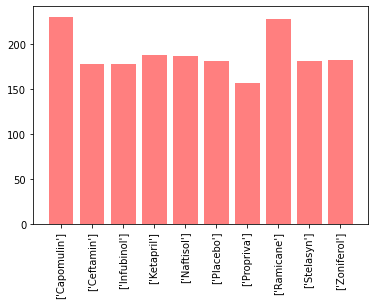

In [104]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#create a list 

# Set x axis and tick locations
x_axis = np.arange(len(regimen_stats))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, regimen_stats["Timepoint"].count(), color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, regimen_stats['Drug Regimen'].unique(), rotation="vertical")


In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.



In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
